Bike Dataset

The dataset provided focuses on used bikes, capturing various attributes to analyze the second-hand bike
market. This dataset helps understand factors influencing resale prices, usage patterns, and market trends for
used bikes.

Title: Bike Details Dataset

Source:

The dataset is available on Kaggle, simulating data commonly observed in real-world online bike resale
platforms.


Description:

The dataset comprises 1061 records of used bike listings. These records include details about the bike's brand
and model, selling price, kilometers driven, ownership history, and other attributes. It is particularly useful for
resale value prediction, market analysis, and understanding buyer preferences.


The dataset consists of 7 features, combining both numeric and categorical data, offering a comprehensive
view of the second-hand bike market.


1. name:- Brand and model name of the bike (Categorical, e.g., "Royal Enfield Classic 350", "Honda Dio")
2. selling_price:- Listed selling price in INR (Numeric, e.g., 175000, 45000)
3. year:- Manufacturing year of the bike (Numeric, e.g., 2019, 2015)
4. seller_type:- Seller category, either "Individual" or "Dealer" (Categorical)
5. owner:- Ownership history, e.g., "1st owner", "2nd owner" (Categorical)
6. km_driven:- Total kilometers driven (Numeric, in km, e.g., 12000, 23000)
7. ex_showroom_price:- Original showroom price in INR (Numeric, e.g., 148114.0, 89643.0, etc,.).

In [2]:
# importing needed modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimpy import skim
import warnings 

warnings.filterwarnings('ignore')

In [ ]:
# get dataset into a Main dataframe by using pandas

main_df=pd.read_csv('BIKE DETAILS.csv')

In [4]:
# now make copy of main df for frature operations 

df=main_df.copy()

In [ ]:
# first 5 rows of df
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [6]:
# check all details of df
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 1061   │ │ string      │ 3     │                                                          │
│ │ Number of columns │ 7      │ │ int32       │ 3     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name         ┃ NA   ┃ NA %  ┃ mean   ┃ sd     ┃ p0     ┃ p25    ┃ p50    ┃ p75   ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ selling_price       │    0 │     0 │  59640 │  56300 │   5000 │  28000 │  45000 │ 70000 │  760000 │   ▇▁   │  │
│ │ year                │    0 │     0 │   2014 │  4.301 │   1988 │   2011 │   2015 │  2017 │    2020 │    ▂▅▇ │  │
│ │ km_driven           │    0 │     0 │  34360 │  51620 │    350 │  13500 │  25000 │ 43000 │  880000 │   ▇    │  │
│ │ ex_showroom_price   │  435 │    41 │  87960 │  77500 │  30490 │  54850 │  72750 │ 87030 │ 1278000 │   ▇    │  │
│ └─────────────────────┴──────┴───────┴────────┴────────┴────────┴────────┴────────┴───────┴─────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ name                      │       0 │          0 │                          3.3 │                     3532 │  │
│ │ seller_type               │       0 │          0 │                            1 │                     1061 │  │
│ │ owner                     │       0 │          0 │                            2 │                     2122 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [ ]:
# ex_showroom_price feature has 435 null values

In [7]:
# 1.What is the range of selling prices in the dataset ?

min_salling_price=df['selling_price'].min()
max_salling_price=df['selling_price'].max()

print(f"range of selling price is {min_salling_price}  to  {max_salling_price}")

range of selling price is 5000  to  760000


In [8]:
# 2.What is the median selling price for bikes in the dataset ?

print(f" median selling price is {df['selling_price'].median()}")

 median selling price is 45000.0


In [11]:
# 3. What is the most common seller type ?

df['seller_type'].value_counts()

seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64

In [ ]:
# most common seller type is 'Individual'.

In [14]:
# 4. How many bikes have driven more than 50,000 kilometers ?
df['km_driven'].where(df['km_driven']>50000).count()

170

In [20]:
# 5. What is the average km_driven value for each ownership type ?
df.groupby('owner')['km_driven'].mean()

owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64

In [21]:
# 6.What proportion of bikes are from the year 2015 or older ?

(df[df['year'] <= 2015].shape[0] / df.shape[0]) * 100

56.64467483506126

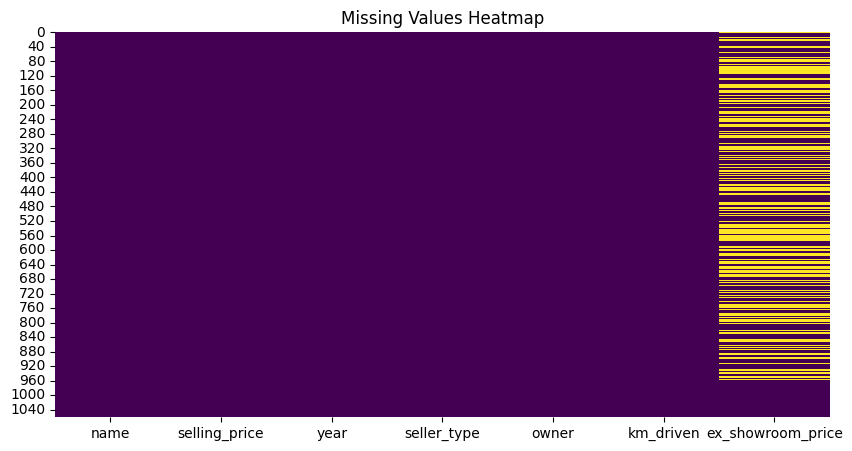

Missing values count:
name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64
Missing values percentage:
name                  0.000000
selling_price         0.000000
year                  0.000000
seller_type           0.000000
owner                 0.000000
km_driven             0.000000
ex_showroom_price    40.999057
dtype: float64


In [22]:
# 7.What is the trend of missing values across the dataset ?
missing_values = df.isnull().sum()
missing_values_percent = (df.isnull().mean()) * 100
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title('Missing Values Heatmap')
plt.show()
print(f"Missing values count:\n{missing_values}")
print(f"Missing values percentage:\n{missing_values_percent}")

In [30]:
# 8.What is the highest ex_showroom_price recorded, and for which bike ?
highest_selling_bike_name=df[df['ex_showroom_price'] == df['ex_showroom_price'].max()]['name']

print(f"highest selling name - {highest_selling_bike_name.unique()} and price is {df['ex_showroom_price'].max()}")

highest selling name - ['Harley-Davidson Street Bob'] and price is 1278000.0


In [31]:
# 9.What is the total number of bikes listed by each seller type ?
df['seller_type'].value_counts()

seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64

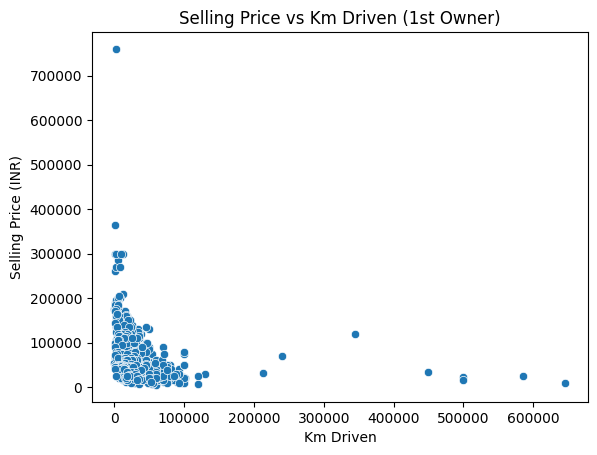

In [32]:
# 10 What is the relationship between selling_price and km_driven for first-owner bikes ?
first_owner_bikes = df[df['owner'] == '1st owner']
sns.scatterplot(data=first_owner_bikes, x='km_driven', y='selling_price')
plt.title('Selling Price vs Km Driven (1st Owner)')
plt.xlabel('Km Driven')
plt.ylabel('Selling Price (INR)')
plt.show()

In [33]:
# 11.Identify and remove outliers in the km_driven column using the IQR methodD.
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]
print(f"Number of outliers removed: {df.shape[0] - df_no_outliers.shape[0]}")

Number of outliers removed: 39


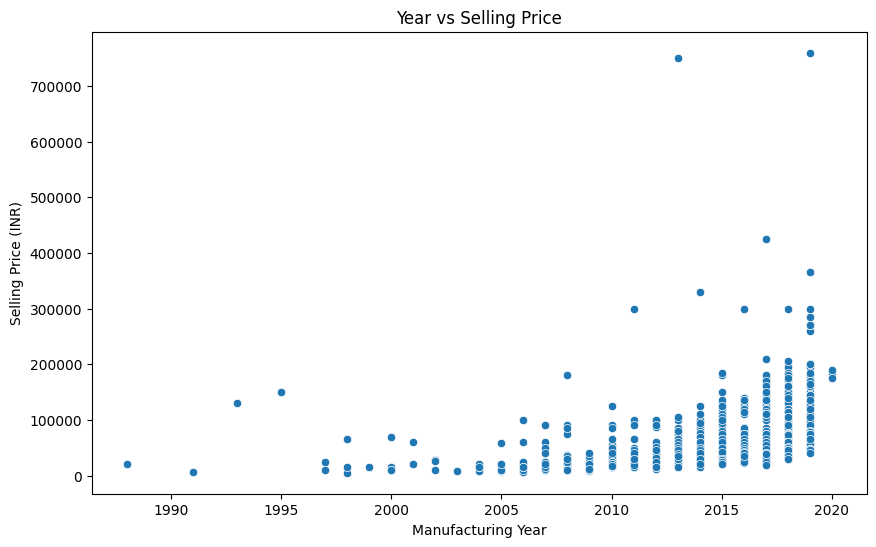

In [34]:
# 12.Perform a bivariate analysis to visualize the relationship between year and selling_price.
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='year', y='selling_price')
plt.title('Year vs Selling Price')
plt.xlabel('Manufacturing Year')
plt.ylabel('Selling Price (INR)')
plt.show()

In [35]:
# 13.What is the average depreciation in selling price based on the bike's age (current year - manufacturingyear) ?
df['age'] = 2024 - df['year']  # Assuming current year is 2024
df['depreciation'] = (df['ex_showroom_price'] - df['selling_price']) / df['ex_showroom_price']
average_depreciation_by_age = df.groupby('age')['depreciation'].mean()
print(f"Average depreciation by age:\n{average_depreciation_by_age}")

Average depreciation by age:
age
4    -0.219982
5     0.026919
6     0.137780
7     0.231457
8     0.335565
9     0.359419
10    0.392326
11    0.468116
12    0.529736
13    0.587735
14    0.581481
15    0.617848
16    0.726615
17    0.620810
18    0.771601
19    0.817691
20    0.671844
21         NaN
22         NaN
23    0.635382
24         NaN
25         NaN
26         NaN
27         NaN
29         NaN
31         NaN
33         NaN
36         NaN
Name: depreciation, dtype: float64


In [36]:
# 14. Which bike names are priced significantly above the average price for their manufacturing year ?
average_price_by_year = df.groupby('year')['selling_price'].mean()
df['price_above_avg'] = df.apply(lambda row: row['selling_price'] > average_price_by_year[row['year']], axis=1)
bikes_above_avg_price = df[df['price_above_avg']]
print(f"Bikes priced above average for their year:\n{bikes_above_avg_price[['name', 'year', 'selling_price']]}")

Bikes priced above average for their year:
                                      name  year  selling_price
0                Royal Enfield Classic 350  2019         175000
2      Royal Enfield Classic Gunmetal Grey  2018         150000
3        Yamaha Fazer FI V 2.0 [2016-2018]  2015          65000
7     Royal Enfield Bullet 350 [2007-2011]  2008         180000
13                           Yamaha YZF R3  2019         365000
...                                    ...   ...            ...
1004                  Bajaj Pulsar  NS 200  2016          60000
1005                    TVS Apache RTR 160  2014          60000
1008                    Bajaj Pulsar 220 F  2012          52000
1012                   Bajaj Pulsar NS 200  2014          50000
1023                Bajaj Avenger 220 dtsi  2012          45000

[334 rows x 3 columns]


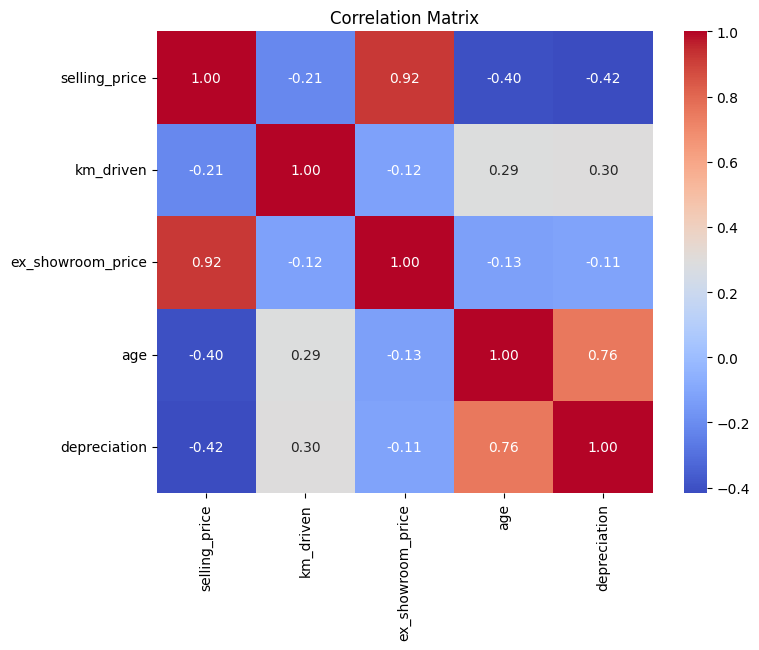

In [37]:
# 15.Develop a correlation matrix for numeric columns and visualize it using a heatmap.
numeric_cols = ['selling_price', 'km_driven', 'ex_showroom_price', 'age', 'depreciation']
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()